<a href="https://colab.research.google.com/github/visualdatabase/fastdup/blob/main/examples/fastdup_peta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fastdup tutorial
Working with multiple attributes (labels) per image

In [2]:
%pip install -U fastdup

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49.9 MB 145 kB/s 
  Attempting uninstall: fastdup
    Found existing installation: fastdup 0.142
    Uninstalling fastdup-0.142:
      Successfully uninstalled fastdup-0.142


# Download the PETA dataset
Peta is a pedestrian tracking dataset which each person has many attributes. 

In [3]:
# PETA dataset from: http://mmlab.ie.cuhk.edu.hk/projects/PETA.html
!gdown 1tH5g0fs-VBrGAY2jru5hZz5q1jkHMbK_

Downloading...
From: https://drive.google.com/uc?id=1tH5g0fs-VBrGAY2jru5hZz5q1jkHMbK_
To: /content/PETA.zip
100% 236M/236M [00:06<00:00, 38.1MB/s]


In [4]:
!unzip -qq /content/PETA.zip -d /content/

In [5]:
!mv '/content/PETA dataset/' /content/peta

In [6]:
import fastdup

In [7]:
import os
files = os.listdir('/content/peta')
files = [f for f in files if not f.endswith('txt') and not 'dataset' in f]

In [8]:
# read all labels to create a pandas dataframe with list of labels per image
import pandas as pd
def get_label_list(fname):
    with open('/content/peta/' + fname + '/archive/Label.txt') as f:
        lines = []
        index = []
        filename = []
        line = f.readline().replace('\n','')
        lines.append(line.split(' ')[1:])
        index.append(line.split(' ')[0])
        filename.append(fname)
        while (line != ''):
            line = f.readline().replace('\n','')
            if len(line):
                lines.append(line.split(' ')[1:])
                index.append(line.split(' ')[0])
                filename.append(fname)

    return pd.DataFrame({'index':index, 'labels':lines, 'file':filename})

In [9]:
labels = pd.DataFrame()
for i in files:
    ret = get_label_list(i)
    labels = labels.append(ret)

In [10]:
labels.head()

index  \
0  0989   
1  0987   
2  0709   
3  0988   
4  0985   

                                                                                                                                                                                                                                                              labels  \
0  [upperBodyBlack, upperBodyWhite, lowerBodyBlack, lowerBodyWhite, hairYellow, footwearBlack, lowerBodyCasual, lowerBodyShortSkirt, personalFemale, personalLess30, upperBodyCasual, upperBodyNoSleeve, hairLong, footwearShoes, carryingNothing, accessoryNothing]   
1                                                            [upperBodyWhite, lowerBodyBlack, hairBlack, lowerBodyCasual, lowerBodyTrousers, personalFemale, personalLess45, upperBodyCasual, upperBodyLongSleeve, hairLong, carryingMessengerBag, accessoryNothing]   
2                                  [upperBodyBlue, lowerBodyBlack, hairBlack, footwearBlack, lowerBodyCasual, lowerBodyTrousers, personalFemale, personalLess30, upperBodyCasual, upperBodyShortSleeve, hairLong, footwearShoes, carryingBackpack, accessoryNothing]   
3                             [upperBodyYellow, lowerBodyGrey, hairBlack, footwearGrey, lowerBodyCasual, lowerBodyJeans, personalFemale, personalLess30, upperBodyCasual, upperBodyShortSleeve, hairLong, footwearSneakers, carryingMessengerBag, accessoryHairBand]   
4                   [upperBodyRed, lowerBodyBlack, hairBrown, footwearWhite, lowerBodyCapri, lowerBodyCasual, personalFemale, personalLess30, upperBodyCasual, upperBodyNoSleeve, hairShort, footwearSandals, carryingMessengerBag, carryingOther, accessoryNothing]   

   file  
0  GRID  
1  GRID  
2  GRID  
3  GRID  
4  GRID

In [18]:
#implement get_label_func: for each full image path return a list of matching labels
def get_label(fname):
    path = fname.split('/')[-3]
    basename = os.path.basename(fname)
    index = basename.split('_')[0]
    #print('index is', index, 'path', path)
    pot = labels[labels['file'] == path]
    pot = pot[pot['index'] == index]
    #print(pot.head())
    if len(pot):
        #print(pot['labels'].values[0])
        return pot['labels'].values[0]
    else:
        return None

In [12]:
%pip install wurlitzer
%load_ext wurlitzer
!rm -fr out_peta
# it is required to play with ccthreshold, higher values will group together more similar images
# lower values relax grouping and group together roughly similar iamges
fastdup.run("/content/peta/", work_dir='out_peta', turi_param='ccthreshold=0.9')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.


0

## Creating components gallery

['upperBodyBlack', 'lowerBodyBlack', 'hairBlack', 'footwearBlack', 'lowerBodyCasual', 'lowerBodyTrousers', 'personalLess45', 'personalMale', 'upperBodyCasual', 'upperBodyLongSleeve', 'upperBodyOther', 'hairShort', 'footwearLeatherShoes', 'carryingNothing', 'accessoryNothing']


100%|██████████| 15/15 [00:00<00:00, 24.22it/s]


Finished OK. Components are stored as image files ./components_index_id.jpg
Stored components visual view in  ./components.html


0

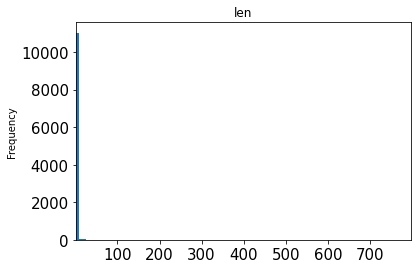

In [13]:
fastdup.create_components_gallery('out_peta', '.', get_label_func=get_label, num_images=15, max_width=300)


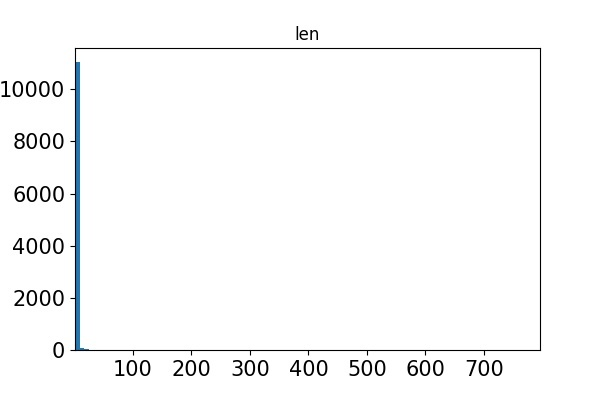
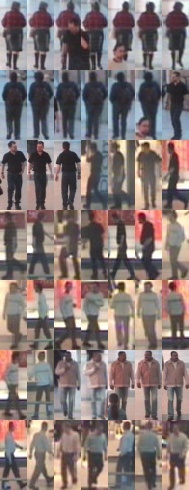
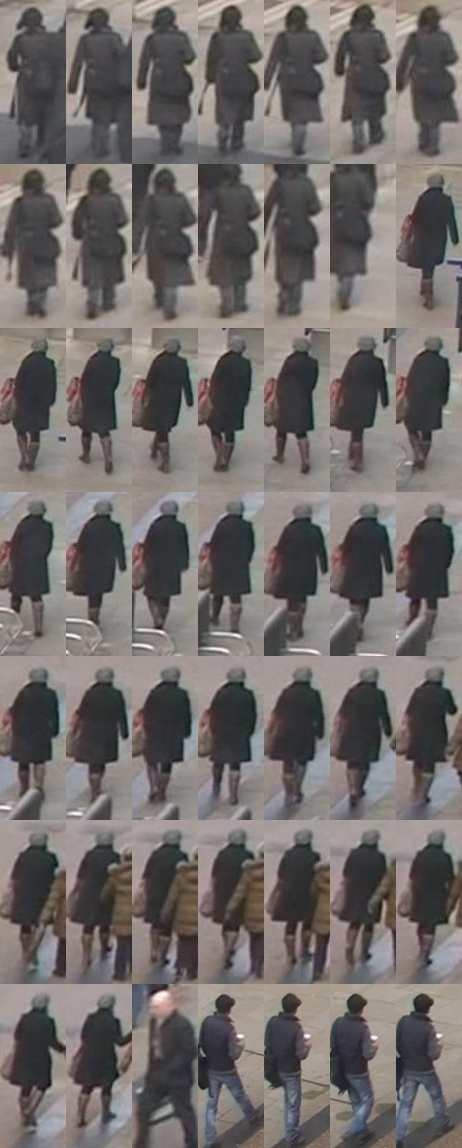
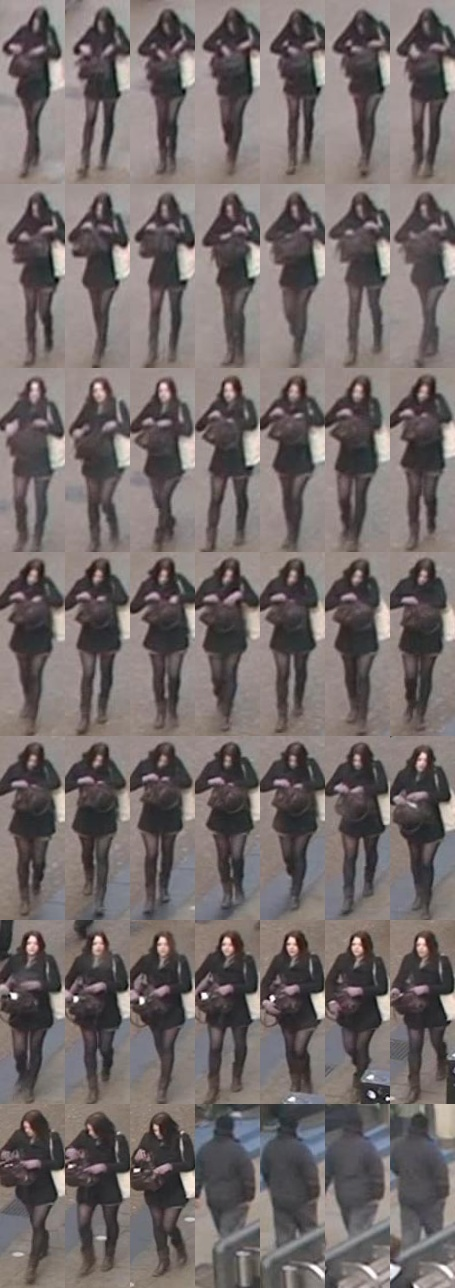
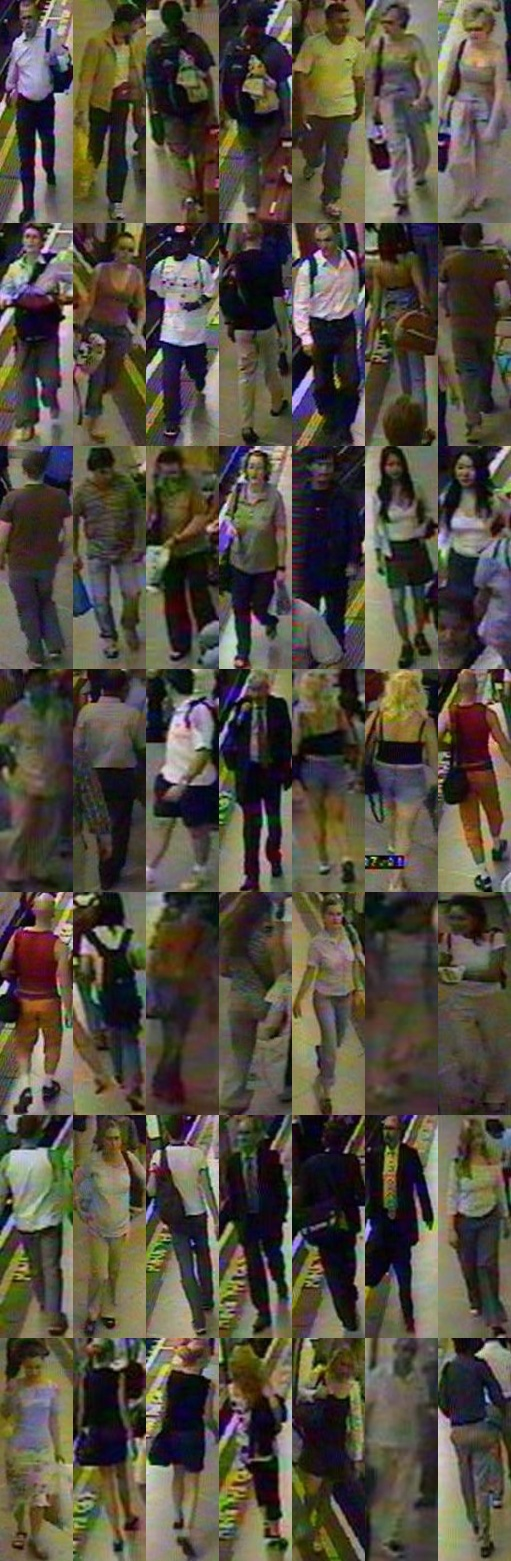
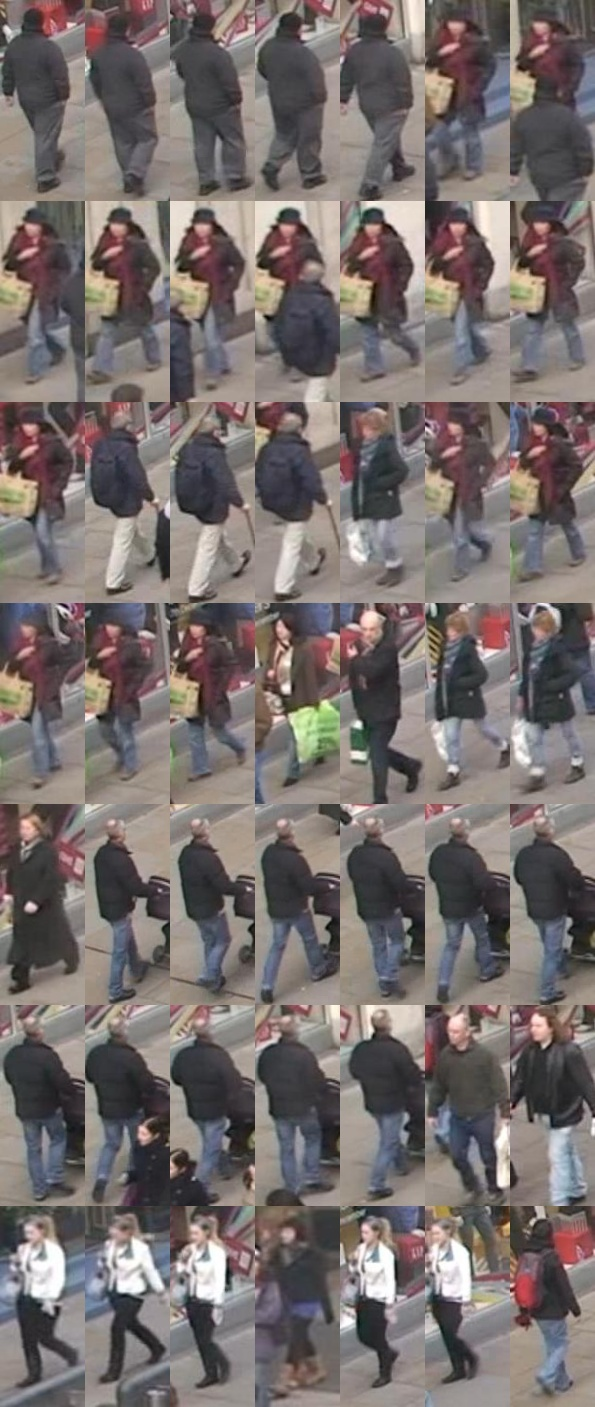
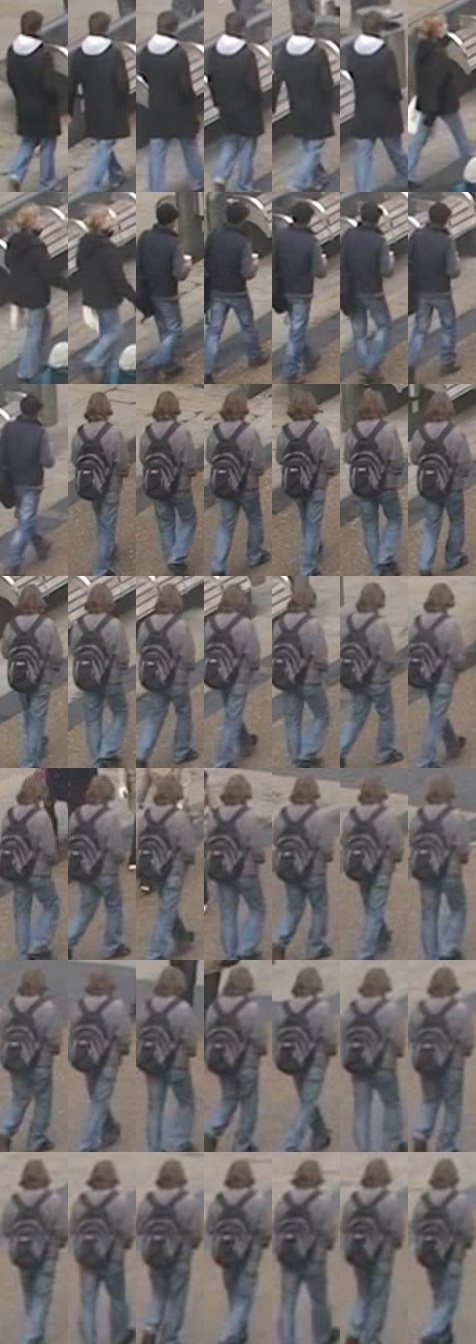
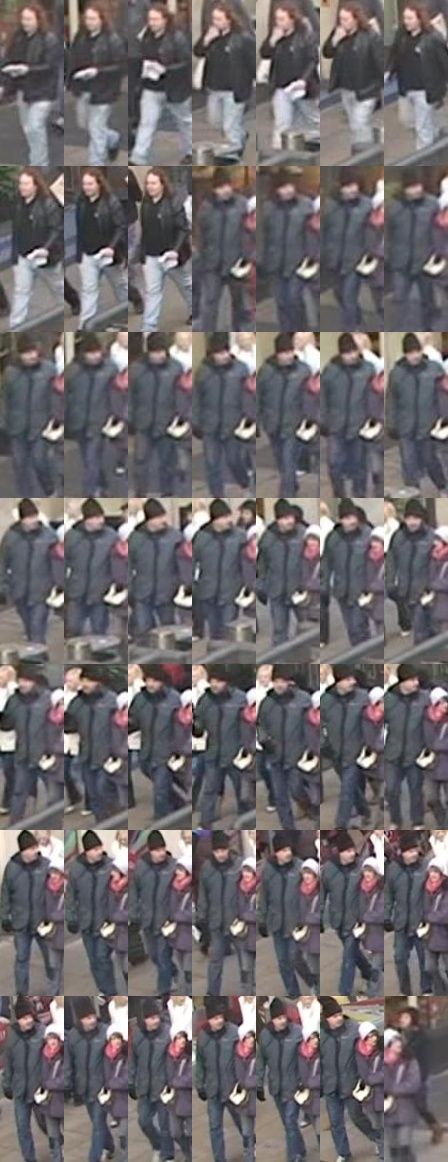
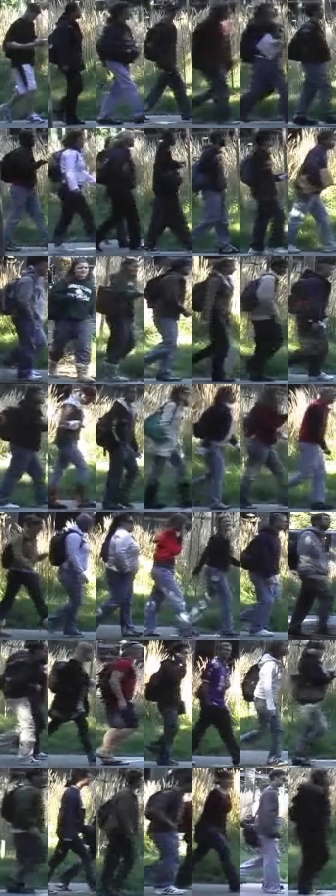
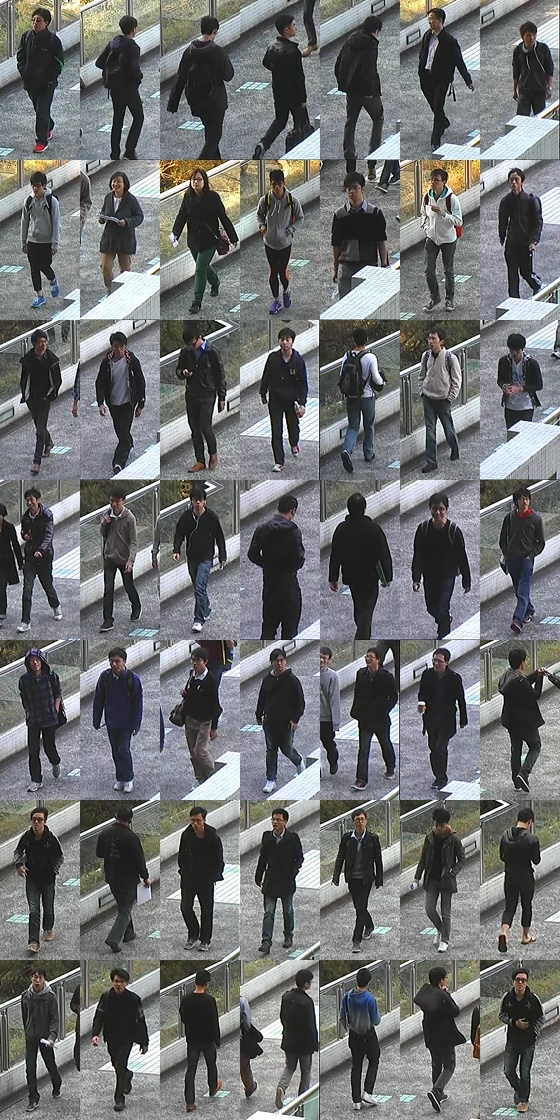
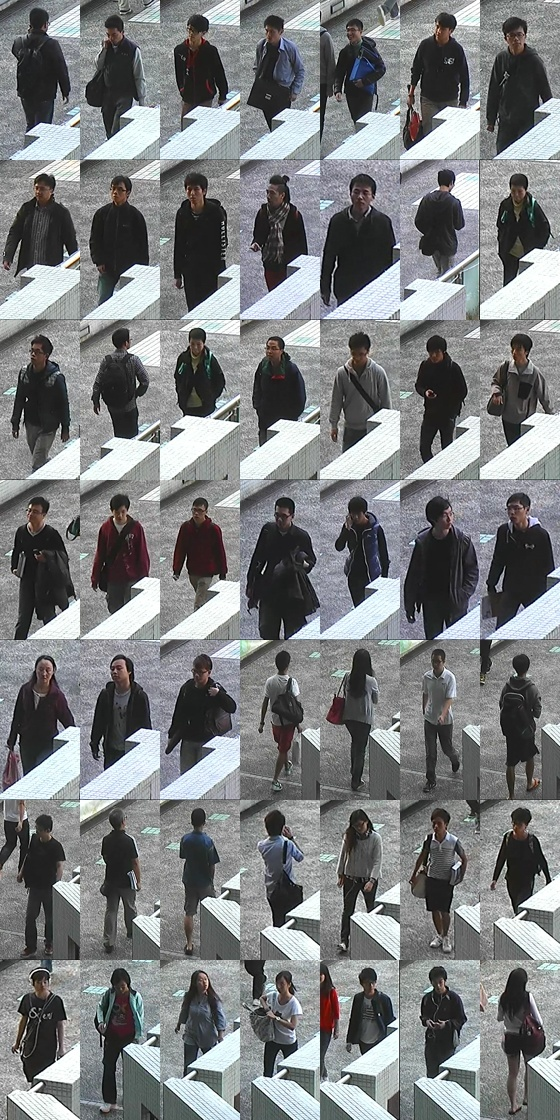
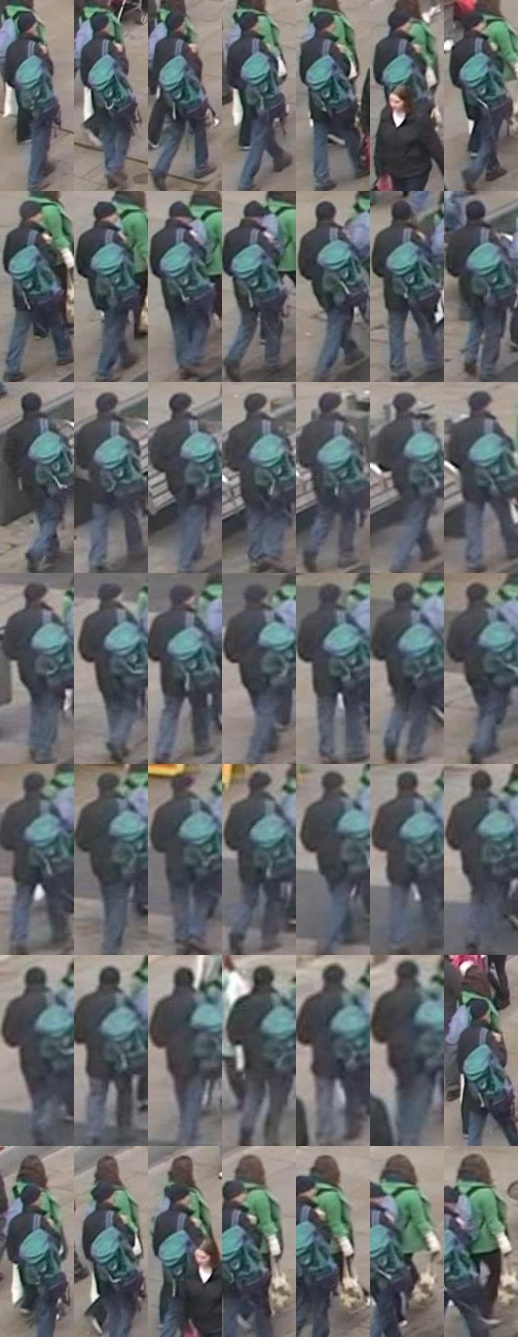
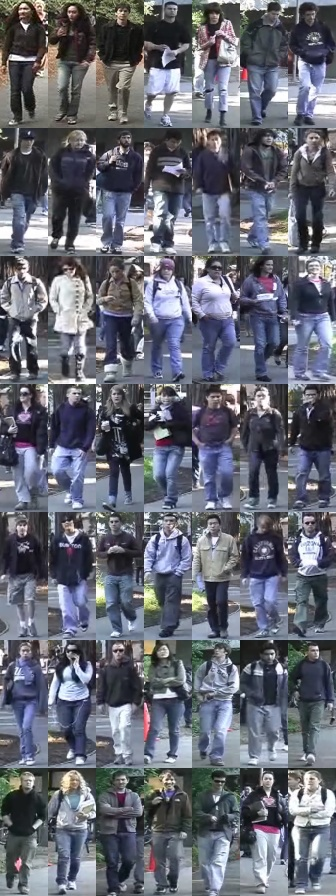
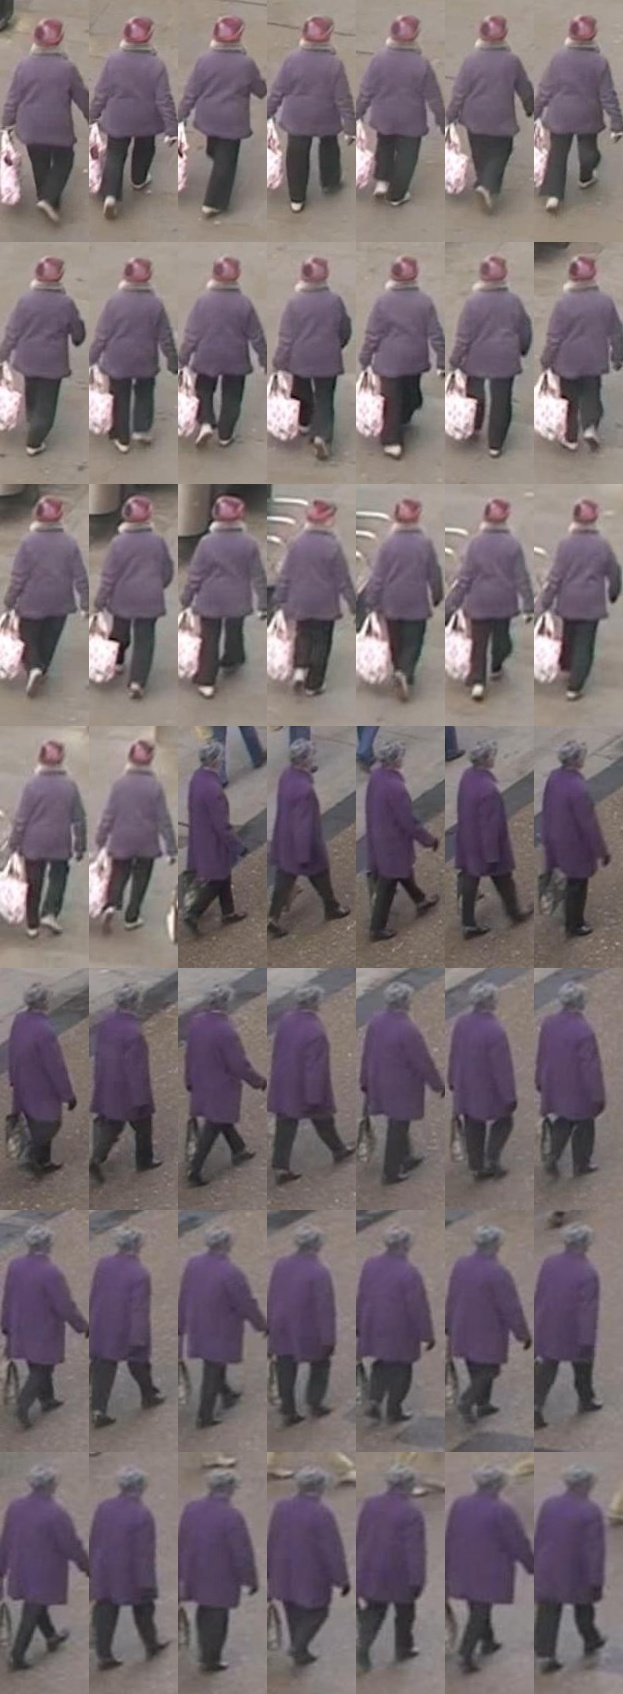
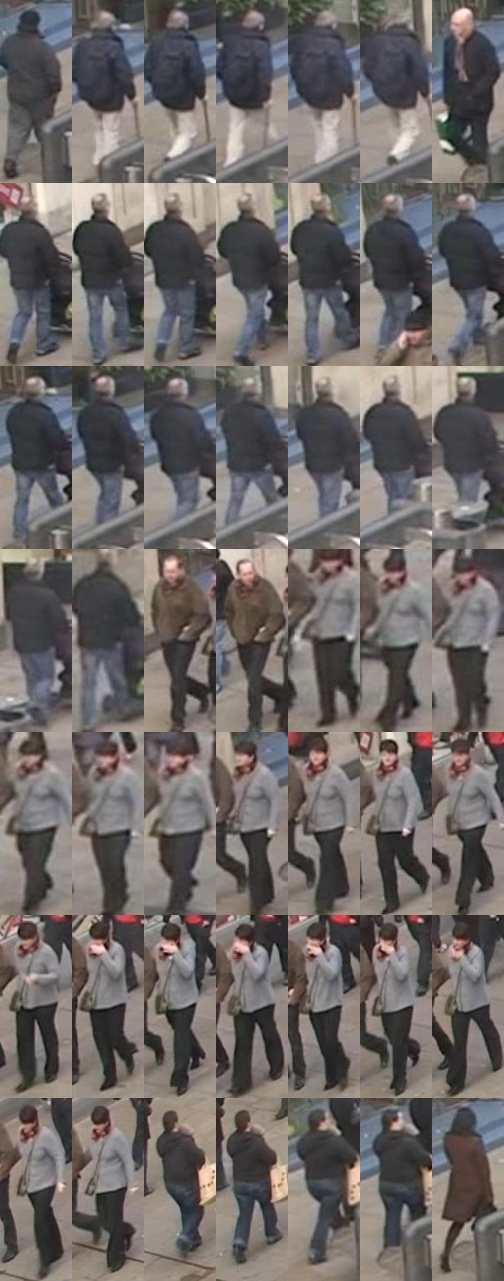
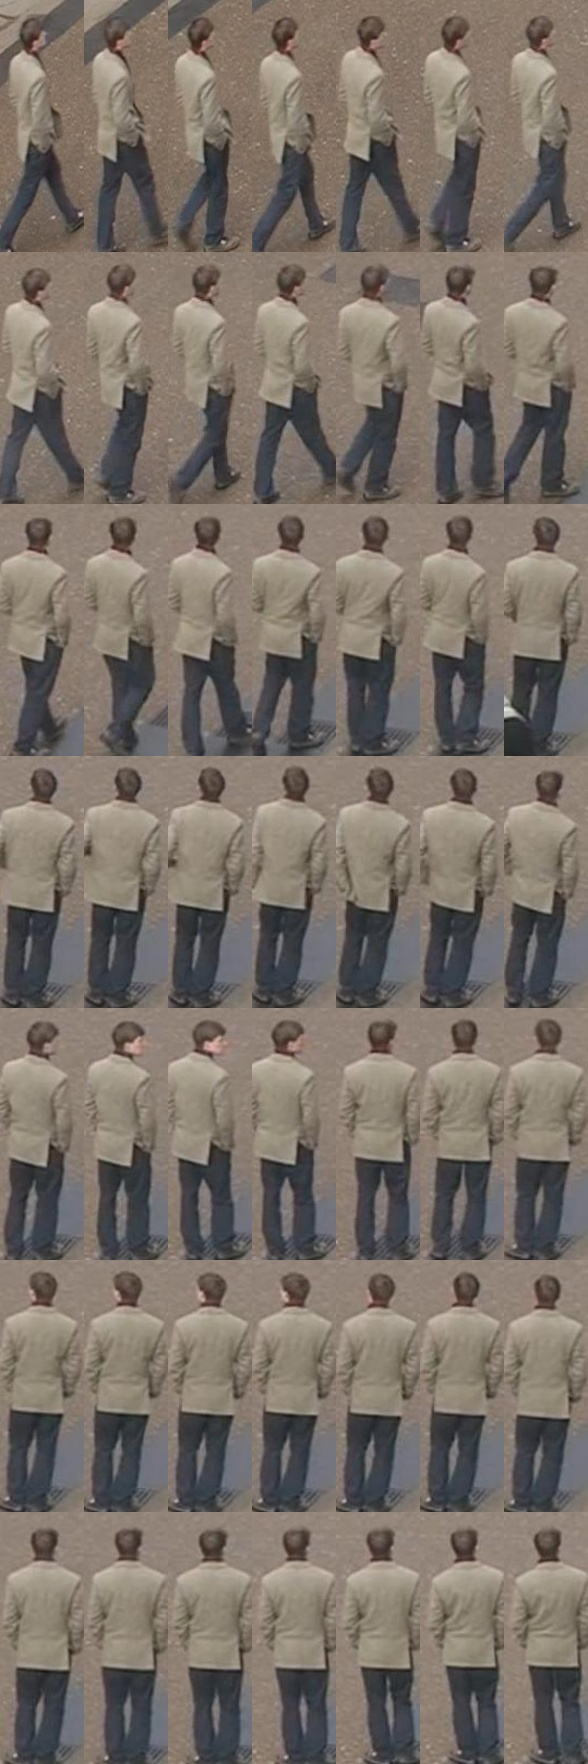

In [14]:
from IPython.display import HTML
HTML('./components.html')

## now slice on a single attribute: footwearWhite

['upperBodyBlack', 'lowerBodyBlue', 'hairBlack', 'footwearWhite', 'lowerBodyCasual', 'lowerBodyJeans', 'personalLess30', 'personalMale', 'upperBodyCasual', 'upperBodyLongSleeve', 'upperBodyOther', 'hairShort', 'footwearSneakers', 'carryingNothing', 'accessoryNothing']


100%|██████████| 5/5 [00:00<00:00, 39.08it/s]

Finished OK. Components are stored as image files ./components_index_id.jpg


Stored components visual view in  ./components.html


0

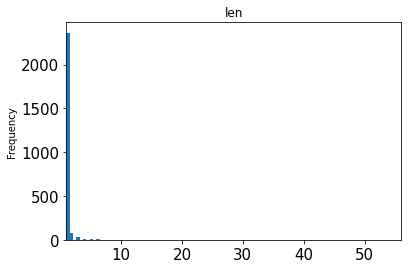

In [15]:
fastdup.create_components_gallery('out_peta', '.', get_label_func=get_label, 
                                  num_images=5, max_width=300, slice='footwearWhite')


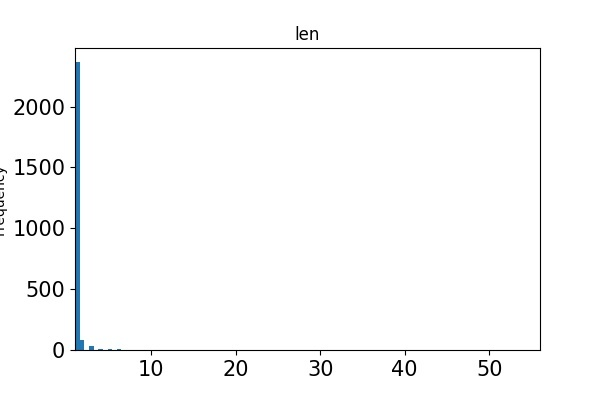
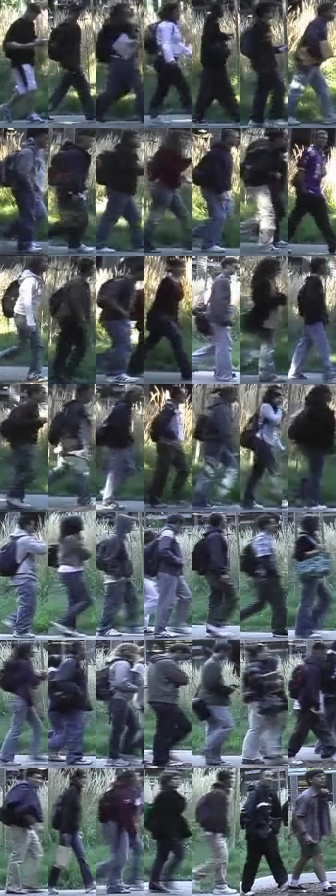
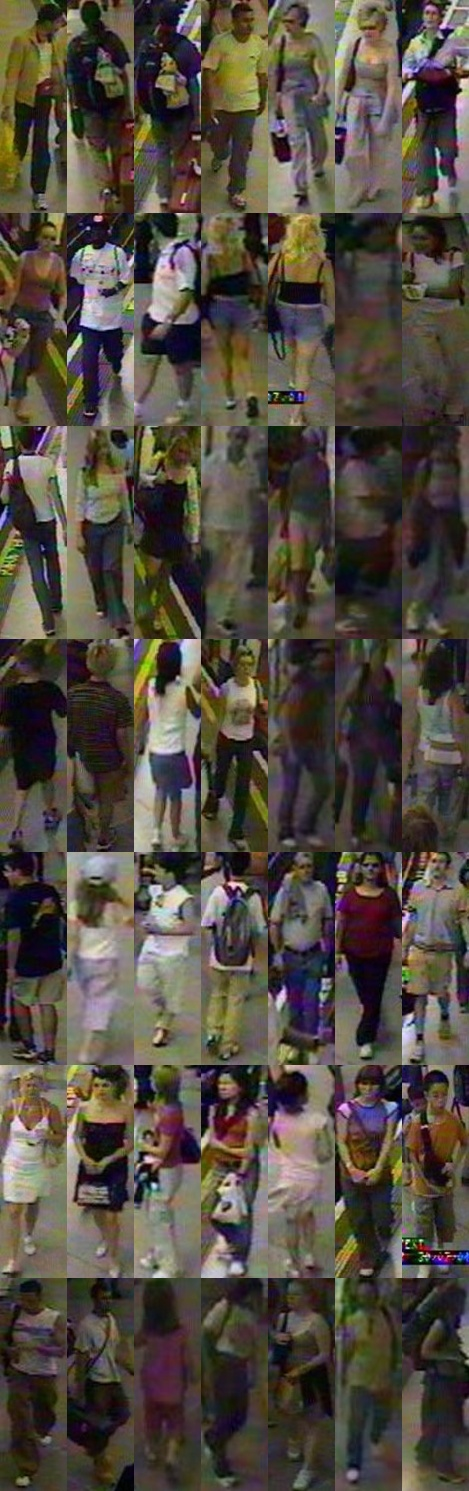
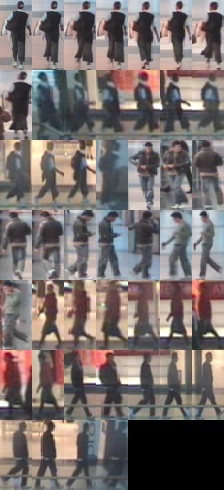
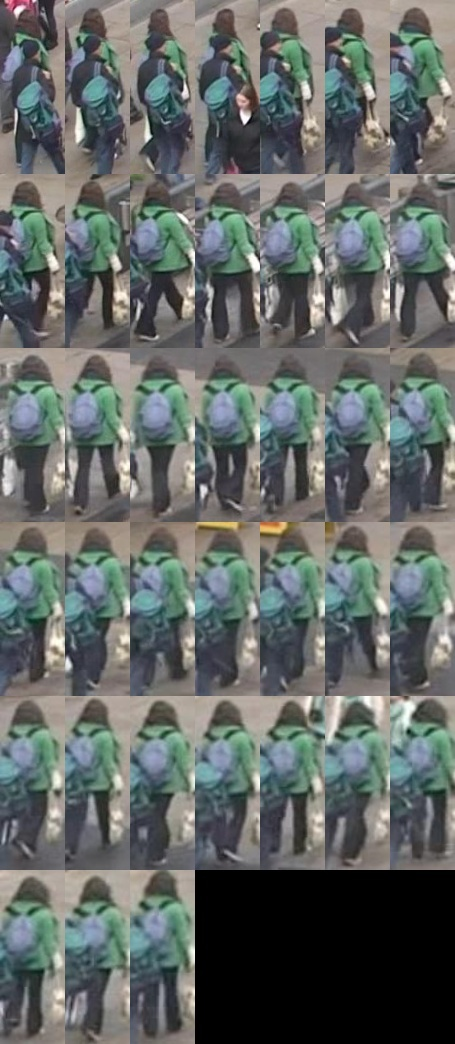
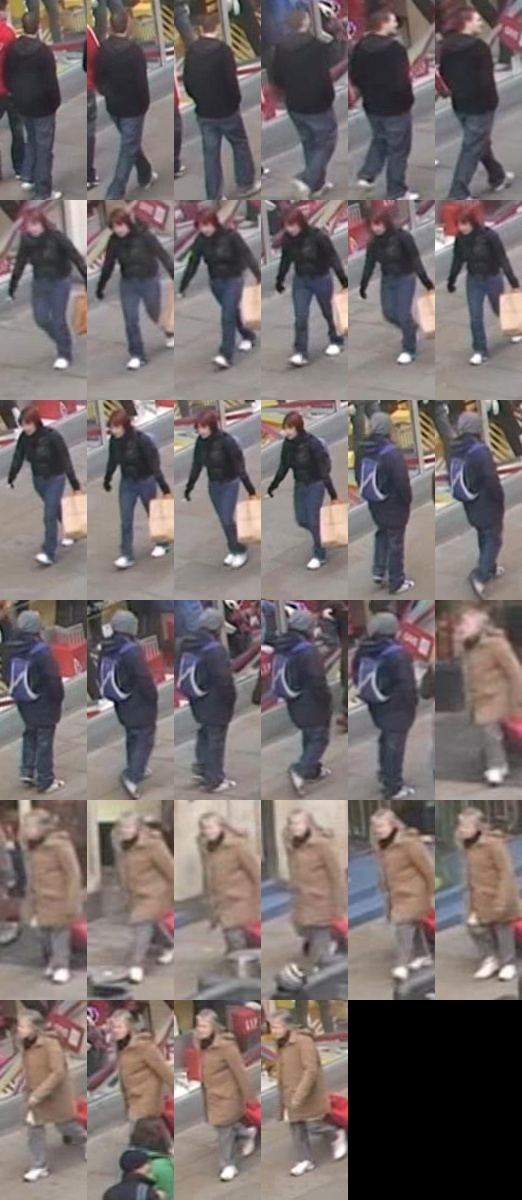

In [16]:
HTML('./components.html')

## Slice on several attributes: either accessoryHat or carryingOther

['upperBodyBlack', 'lowerBodyBlack', 'hairBlack', 'footwearBlack', 'lowerBodyCasual', 'lowerBodyTrousers', 'personalFemale', 'personalLess30', 'upperBodyCasual', 'upperBodyLongSleeve', 'upperBodyOther', 'hairLong', 'footwearShoes', 'carryingOther', 'accessoryNothing']


100%|██████████| 5/5 [00:00<00:00, 30.30it/s]

Finished OK. Components are stored as image files ./components_index_id.jpg


Stored components visual view in  ./components.html



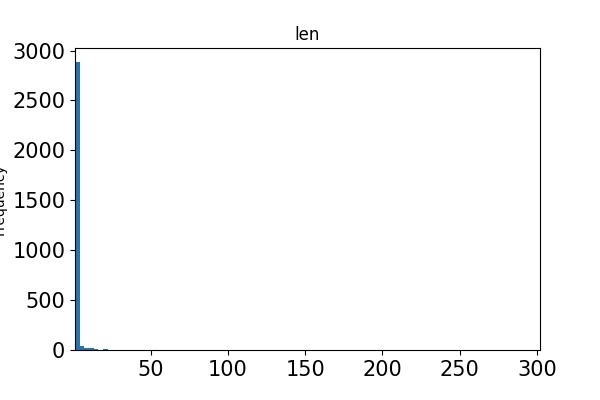
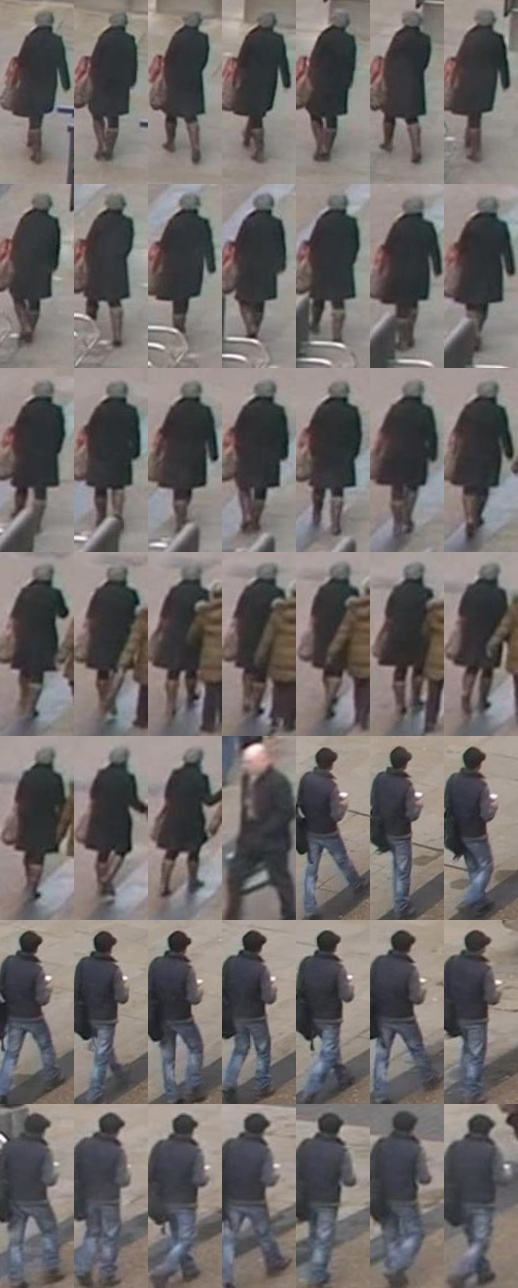
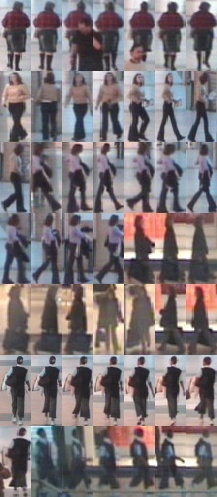
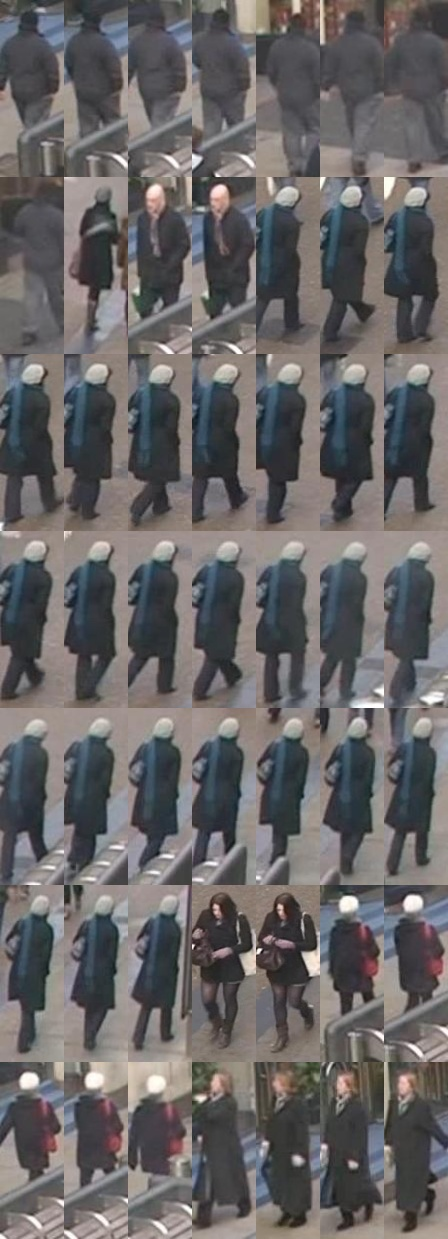
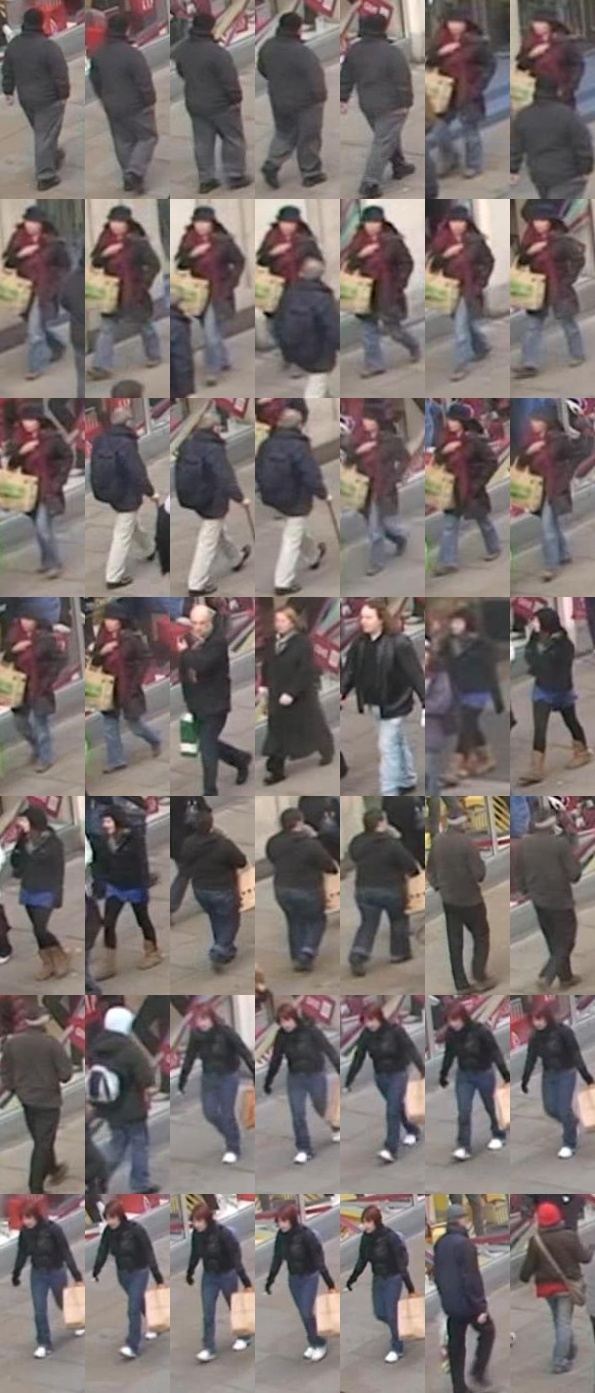
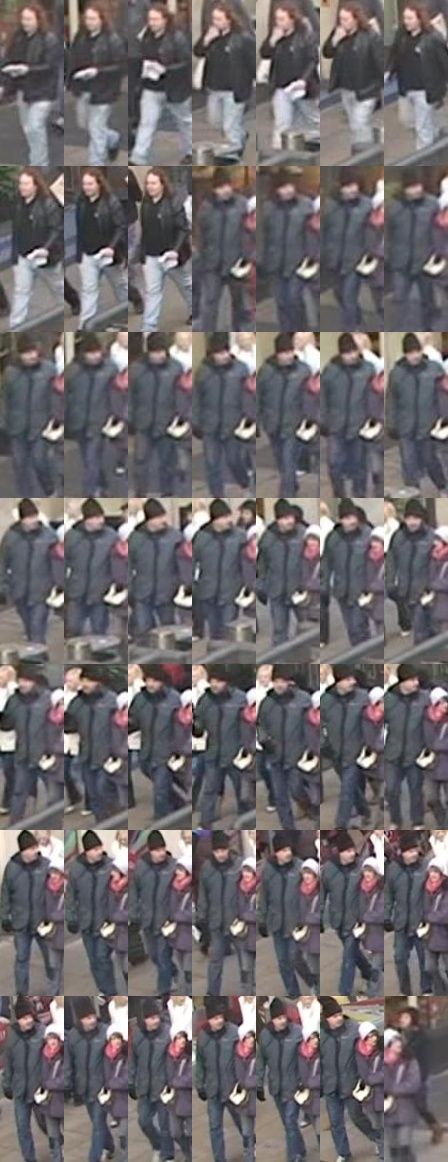

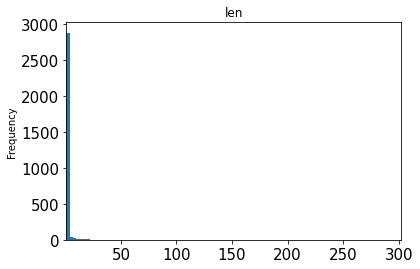

In [17]:
fastdup.create_components_gallery('out_peta', '.', get_label_func=get_label, 
                                  num_images=5, max_width=300, slice=['accessoryHat','carryingOther'])
HTML('./components.html')